In [1]:
import cv2
import numpy as np
import os
from PIL import Image
image_path = 'WhatsApp Image 2025-02-05 at 11.10.54_bf36262c.jpg' 
image = cv2.imread(image_path)

if image is None:
  raise FileNotFoundError("Image not found. Please provide a valid image path.")

original_size = os.path.getsize(image_path)

lossless_path = 'compressed_lossless.png'
cv2.imwrite(lossless_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 2])
lossless_size = os.path.getsize(lossless_path)

lossy_path = 'compressed_lossy_70.jpg'
cv2.imwrite(lossy_path, image, [cv2.IMWRITE_JPEG_QUALITY, 70])
lossy_size_70 = os.path.getsize(lossy_path)

webp_path = 'compressed_lossy_70.webp'
cv2.imwrite(webp_path, image, [cv2.IMWRITE_WEBP_QUALITY, 70])
webp_size_70 = os.path.getsize(webp_path)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
U, S, Vt = np.linalg.svd(image_gray, full_matrices=False)
k = 50 
compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
pca_path = 'compressed_pca.jpg'
cv2.imwrite(pca_path, compressed_image)
pca_size = os.path.getsize(pca_path)

print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"Lossless PNG Size: {lossless_size / 1024:.2f} KB")
print(f"Lossy JPEG Size (Quality 70): {lossy_size_70 / 1024:.2f} KB")
print(f"Lossy WebP Size (Quality 70): {webp_size_70 / 1024:.2f} KB")
print(f"PCA-Based Compression Size: {pca_size / 1024:.2f} KB")

if lossless_size > original_size:
  print("Warning: Lossless PNG compression increased the file size. Consider using a different format.")

Original Image Size: 36.64 KB
Lossless PNG Size: 145.76 KB
Lossy JPEG Size (Quality 70): 21.04 KB
Lossy WebP Size (Quality 70): 8.50 KB
PCA-Based Compression Size: 46.81 KB


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9060 - loss: 0.3058 - val_accuracy: 0.9863 - val_loss: 0.0410
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9875 - loss: 0.0429 - val_accuracy: 0.9884 - val_loss: 0.0368
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9908 - loss: 0.0275 - val_accuracy: 0.9846 - val_loss: 0.0489
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9888 - val_loss: 0.0372
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9885 - val_loss: 0.0396
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.9913 - val_loss: 0.0315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9923 - val_loss: 0.0267
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9976 - loss: 0

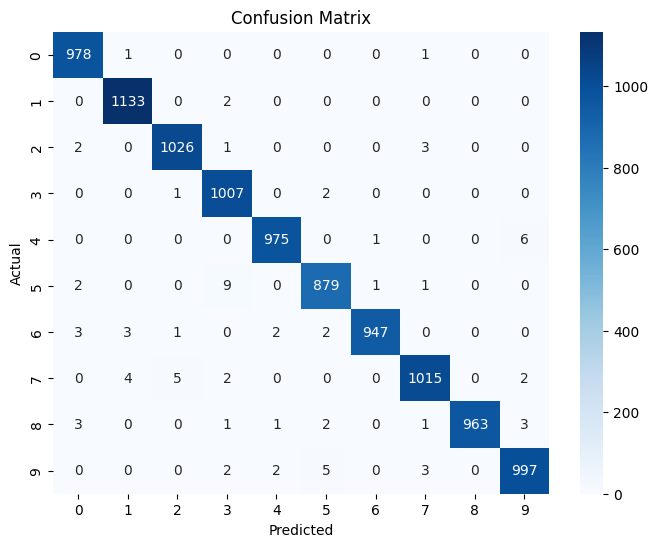

AUC Score: 0.9999
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.83      0.83      0.83      1000
           2       0.62      0.61      0.62      1000
           3       0.48      0.60      0.54      1000
           4       0.69      0.65      0.67      1000
           5       0.60      0.59      0.60      1000
           6       0.82      0.74      0.78      1000
           7       0.83      0.69      0.76      1000
           8       0.77      0.85      0.81      1000
           9       0.80      0.79      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



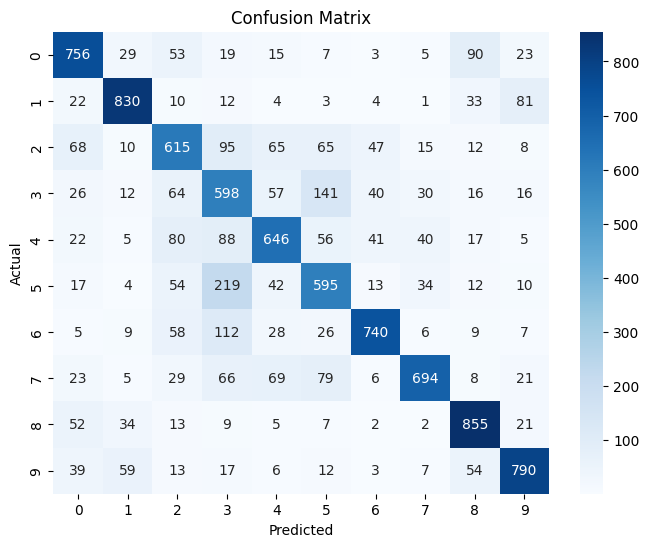

AUC Score: 0.9558


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
x_train_cifar = x_train_cifar.astype("float32") / 255.0
x_test_cifar = x_test_cifar.astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train_cifar = keras.utils.to_categorical(y_train_cifar, num_classes)
y_test_cifar = keras.utils.to_categorical(y_test_cifar, num_classes)

def create_cnn(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_mnist = create_cnn((28, 28, 1), num_classes)
history_mnist = model_mnist.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

model_cifar = create_cnn((32, 32, 3), num_classes)
history_cifar = model_cifar.fit(x_train_cifar, y_train_cifar, epochs=10, batch_size=32, validation_data=(x_test_cifar, y_test_cifar))

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))
    
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
    print(f'AUC Score: {auc_score:.4f}')

evaluate_model(model_mnist, x_test, y_test)
evaluate_model(model_cifar, x_test_cifar, y_test_cifar)
